# Recap

Hey class, I had a couple bugs in my class demos, and I want to review what happened a bit.  Let this be an example to you of what NOT to do! :)

## Bug 1

Let's say I had this data (much simpler that what we had earlier, but illustrates the same point):

In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [2]:
hydrants = DataFrame({
    "name": ["A", "B", "C", "D", "E"],
    "year": [2009, 2010, 2010, 2009, 2009],
    "alt": [1000, 1020, 1025, 1009, 987]
})

hydrants

,name,year,alt
0,A,2009,1000
1,B,2010,1020
2,C,2010,1025
3,D,2009,1009
4,E,2009,987


Let's say we want a bar plot with year as the axis.  If I have a Series s, then s.plot.bar will use the index of s for the x-axis.

### Bad example

In order to make the year the x-axis, I did the following:

In [3]:
hydrants.set_index("year")

,name,alt
year,,
2009,A,1000
2010,B,1020
2010,C,1025
2009,D,1009
2009,E,987


Of course, that's not what we want to plot.

In [4]:
hydrants.set_index("year").plot.bar()

Doesn't make a lot of sense, right?

### Good Example

I still want to get the years over into the index, but I don't want the same year showing up multiple times (e.g., in the bad example, 2009 appears in the index 3 times).  Instead, I want each year to appear once in the index, and I want the values to be the number of hydrants for that year.  For this, I can use `.value_counts()`.

In [5]:
hydrants["year"].value_counts()

2009    3
2010    2
Name: year, dtype: int64

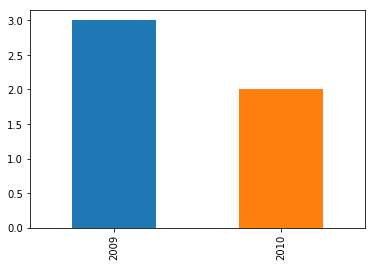

In [6]:
hydrants["year"].value_counts().plot.bar()

Ah, that's what we want!

## Bug 2

This was not so much a bug, as an issue that popped up when I ran the same cell twice.  Consider this df:

In [7]:
# cell 1
returns = DataFrame({
    "year": [2010, 2011, 2012],
    "return": [1.1, 1.2, 0.9]
})

In [8]:
# cell 2
returns = returns["return"]

In [9]:
returns

0    1.1
1    1.2
2    0.9
Name: return, dtype: float64

No issues in either of the above cells, but what would happen if I tried running cell 2 again (without running cell 1 again)?  The first time cell 2 runs, `returns` is a DataFrame.  The second time, though, it will be a Series.  It's often hard to see these issues since you can't see what code was previously run.  Manually running cell 2 twice is equivalent to the following, however:

In [10]:
# cell 1
returns = DataFrame({
    "year": [2010, 2011, 2012],
    "return": [1.1, 1.2, 0.9]
})

In [11]:
# cell 2
returns = returns["return"]
returns

0    1.1
1    1.2
2    0.9
Name: return, dtype: float64

In [12]:
# cell 2 (again)
returns = returns["return"]
returns

KeyError: 'return'

Of course, the way to avoid issues like these is to often click "Restart & Run All" from the "Kernel" menu in your notebook.